In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/pokemon_status.csv', encoding='shift-jis')

In [ ]:
df.head()

,図鑑番号,ポケモン名,タイプ１,タイプ２,通常特性１,通常特性２,夢特性,HP,こうげき,ぼうぎょ,とくこう,とくぼう,すばやさ,合計
0,1,フシギダネ,くさ,どく,しんりょく,NaN,ようりょくそ,45,49,49,65,65,45,318.0
1,2,フシギソウ,くさ,どく,しんりょく,NaN,ようりょくそ,60,62,63,80,80,60,405.0
2,3,フシギバナ,くさ,どく,しんりょく,NaN,ようりょくそ,80,82,83,100,100,80,525.0
3,003-1,メガフシギバナ,くさ,どく,あついしぼう,NaN,NaN,80,100,123,122,120,80,625.0
4,4,ヒトカゲ,ほのお,NaN,もうか,NaN,サンパワー,39,52,43,60,50,65,309.0


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
column_names = df.columns

In [ ]:
type(column_names)

pandas.core.indexes.base.Index

In [ ]:
rows_to_remove = ['図鑑番号','HP', 'こうげき','ぼうぎょ', 'とくこう', 'とくぼう', 'すばやさ', '合計'] # 削除したい行のインデックス
column_names = column_names.drop(rows_to_remove)

In [ ]:
# column_names = pd.DataFrame(column_names)

これ、パンダス(データフレーム型)にすることで、色々いいことあるんだよ。
以下、GPT

---


NumPy型のデータをPandas型（主にDataFrame）に変換することにはいくつかの利点があります：

1. **ラベル付けされたデータ**:
   - Pandas DataFrameは列にラベル（列名）を持っています。これにより、データが何を表しているかを直感的に理解しやすくなります。NumPyの多次元配列は通常、単に数値の行列であり、各次元が何を表しているかが不明瞭です。

2. **柔軟なデータ操作**:
   - Pandasはデータの選択、フィルタリング、結合、グループ化など、多くの柔軟で強力なデータ操作機能を提供しています。これにより、データのクリーニング、変換、解析が簡単に行えます。

3. **欠損値の処理**:
   - Pandasは欠損値を効果的に扱うためのツールを提供しています。DataFrame内の欠損値を特定し、削除したり、別の値で埋めたりすることが容易です。

4. **統計処理と可視化**:
   - Pandasは統計的な要約統計量の計算やデータの可視化のための統合されたツールを提供しています。これにより、データの探索的な分析がしやすくなります。

5. **時系列データのサポート**:
   - Pandasは時系列データを扱うための特別なデータ構造を提供しており、時系列データの処理が容易です。これは金融データやセンサーデータなどの分野で特に役立ちます。

6. **他のライブラリとの統合**:
   - Pandasは他の多くのデータサイエンスライブラリとの統合が良好です。Scikit-learn、Matplotlib、Seabornなどとの連携が容易で、統一されたデータ構造を使用することで、異なるライブラリを組み合わせて効果的に利用できます。

総じて、Pandasはデータの整理、処理、解析、可視化など、データサイエンスや機械学習の多くのタスクにおいて柔軟で強力なツールとなります。

In [ ]:
df.head() #表示してみる。これからやりたいのは、これらを数値化すること。

,図鑑番号,ポケモン名,タイプ１,タイプ２,通常特性１,通常特性２,夢特性,HP,こうげき,ぼうぎょ,とくこう,とくぼう,すばやさ,合計
0,1,フシギダネ,くさ,どく,しんりょく,NaN,ようりょくそ,45,49,49,65,65,45,318.0
1,2,フシギソウ,くさ,どく,しんりょく,NaN,ようりょくそ,60,62,63,80,80,60,405.0
2,3,フシギバナ,くさ,どく,しんりょく,NaN,ようりょくそ,80,82,83,100,100,80,525.0
3,003-1,メガフシギバナ,くさ,どく,あついしぼう,NaN,NaN,80,100,123,122,120,80,625.0
4,4,ヒトカゲ,ほのお,NaN,もうか,NaN,サンパワー,39,52,43,60,50,65,309.0


In [ ]:
df_1 = df.drop(labels=['図鑑番号','すばやさ','とくぼう','とくこう','ぼうぎょ','こうげき','HP'],axis=1)

In [ ]:
df_1.head()

,ポケモン名,タイプ１,タイプ２,通常特性１,通常特性２,夢特性,合計
0,フシギダネ,くさ,どく,しんりょく,NaN,ようりょくそ,318.0
1,フシギソウ,くさ,どく,しんりょく,NaN,ようりょくそ,405.0
2,フシギバナ,くさ,どく,しんりょく,NaN,ようりょくそ,525.0
3,メガフシギバナ,くさ,どく,あついしぼう,NaN,NaN,625.0
4,ヒトカゲ,ほのお,NaN,もうか,NaN,サンパワー,309.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [ ]:
# 文字列を数値に変換（Label Encoding）
label_encoder = LabelEncoder()
df_1['ポケモン名'] = label_encoder.fit_transform(df_1['ポケモン名'])
df_1['タイプ１'] = label_encoder.fit_transform(df_1['タイプ１'])
df_1['タイプ２'] = label_encoder.fit_transform(df_1['タイプ２'])
df_1['通常特性１'] = label_encoder.fit_transform(df_1['通常特性１'])
df_1['通常特性２'] = label_encoder.fit_transform(df_1['通常特性２'])
df_1['夢特性'] = label_encoder.fit_transform(df_1['夢特性'])

In [ ]:
df_1.fillna(0, inplace=True)

In [ ]:
df_1.head()

,ポケモン名,タイプ１,タイプ２,通常特性１,通常特性２,夢特性,合計
0,596,3,7,37,118,113,318.0
1,595,3,7,37,118,113,405.0
2,597,3,7,37,118,113,525.0
3,762,3,7,2,118,149,625.0
4,554,10,18,107,118,122,309.0


In [ ]:
t = df_1['合計'].values
x = df_1.drop('合計',axis=1).values

In [ ]:
x

array([[596,   3,   7,  37, 118, 113],
       [595,   3,   7,  37, 118, 113],
       [597,   3,   7,  37, 118, 113],
       ...,
       [489,  13,  18, 162, 118, 149],
       [677,   8,  17, 137, 118, 149],
       [706,   2,  14, 141, 118, 149]])

In [ ]:
t

array([318., 405., 525., 625., 309., 405., 534., 634., 634., 314., 405.,
       530., 630., 195., 205., 395., 195., 205., 395., 495., 251., 349.,
       479., 579., 253., 253., 413., 413., 262., 442., 288., 448., 320.,
       485., 485., 300., 300., 450., 450., 275., 365., 505., 273., 365.,
       505., 323., 483., 299., 299., 505., 505., 270., 435., 245., 455.,
       320., 395., 490., 285., 405., 305., 450., 265., 265., 425., 425.,
       290., 290., 440., 440., 320., 500., 305., 455., 350., 555., 300.,
       385., 510., 310., 400., 500., 600., 305., 405., 505., 300., 390.,
       490., 335., 515., 300., 300., 390., 390., 495., 495., 410., 500.,
       315., 490., 590., 325., 465., 377., 310., 470., 325., 475., 325.,
       325., 500., 500., 305., 525., 310., 405., 500., 600., 385., 328.,
       483., 325., 475., 330., 490., 325., 530., 530., 320., 425., 425.,
       455., 455., 385., 340., 490., 345., 485., 450., 435., 490., 590.,
       295., 440., 320., 450., 340., 520., 460., 50

In [ ]:
t.shape

(909,)

In [ ]:
x.shape

(909, 6)

In [ ]:
x

array([[596,   3,   7,  37, 118, 113],
       [595,   3,   7,  37, 118, 113],
       [597,   3,   7,  37, 118, 113],
       ...,
       [489,  13,  18, 162, 118, 149],
       [677,   8,  17, 137, 118, 149],
       [706,   2,  14, 141, 118, 149]])

In [ ]:
from sklearn.model_selection import train_test_split #これが、学習用とテスト用を分けるために必要な関数。

x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.2, random_state=0)

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
t_test.shape

(182,)

In [ ]:
len(x)

909

In [ ]:
len(t)

909

In [ ]:
len(x_test)

182

In [ ]:
len(t_test)

182

In [ ]:
from sklearn.linear_model import LinearRegression #重回帰モデル

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train,t_train)

LinearRegression()

In [ ]:
model.coef_ #重みは8個。これはlabelが8個あったからだな。coef_に重みが入ってる。

array([ 0.02441975, -0.126293  , -3.24583624,  0.12941052,  0.4437022 ,
        0.58169687])

In [ ]:
print(f'train score; {model.score(x_train, t_train)}')
print(f'test score; {model.score(x_test, t_test)}')

train score; 0.13619685214130672
test score; 0.15314092484711228


In [ ]:
y = model.predict(x_test)

In [ ]:
print(f'予測値:{y[5]}')
print(f'目標値:{t_test[5]}')

予測値:511.315549843316
目標値:600.0


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
mean_absolute_error(y, t_test) #予測値と目標値の差の平均

101.23880981478887

In [ ]:
np.sqrt(mean_squared_error(y, t_test)) #予測値と目標値の二条平均誤差の平方根

120.97192237257467

In [ ]:
r2_score(y, t_test)

-6.087668967132803

<BarContainer object of 6 artists>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12509 (\N{KATAKANA LETTER PO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12465 (\N{KATAKANA LETTER KE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12514 (\N{KATAKANA LETTER MO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 21517 (\N{CJK UNIFIED IDEOGRAPH-540D}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  func(*a

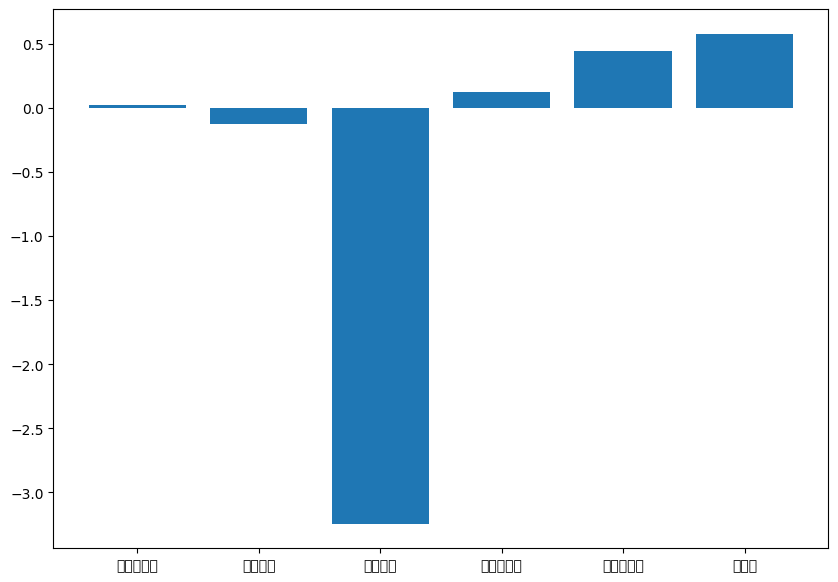

In [ ]:
plt.figure(figsize=(10,7))
plt.bar(x=column_names, height=model.coef_)

In [ ]:
df_1_corr = df_1.corr()

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_1_corr.iloc[::20, :20], annot = True)

NameError: ignored

<Figure size 1200x800 with 0 Axes>

In [ ]:
df_2 = pd.read_csv('/content/pokemon_log_gpt35 .tsv', sep='\t')

In [ ]:
df_2.shape